In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib as mpl 
import seaborn as sns
import plotly.express as px

In [3]:
# carrega os dados
data = px.data.gapminder()

In [4]:
df = data.query('country == "Brazil"').set_index('year')

In [5]:
df.head()

,country,continent,lifeExp,pop,gdpPercap,iso_alpha,iso_num
year,,,,,,,
1952,Brazil,Americas,50.917,56602560,2108.944355,BRA,76
1957,Brazil,Americas,53.285,65551171,2487.365989,BRA,76
1962,Brazil,Americas,55.665,76039390,3336.585802,BRA,76
1967,Brazil,Americas,57.632,88049823,3429.864357,BRA,76
1972,Brazil,Americas,59.504,100840058,4985.711467,BRA,76


Text(0.5, 0, 'Tempo')

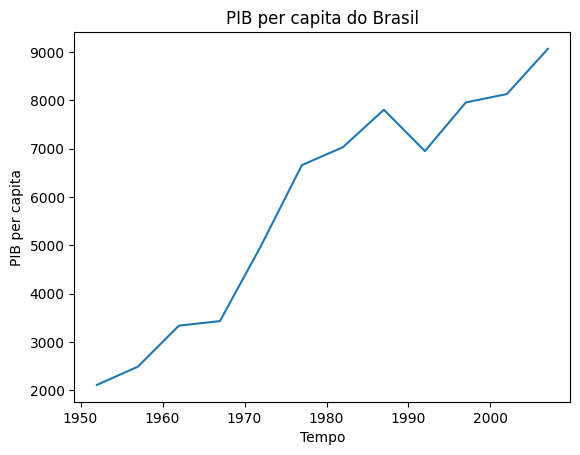

In [7]:
plt.plot(df.index, df['gdpPercap'])
plt.title('PIB per capita do Brasil')
plt.ylabel('PIB per capita')
plt.xlabel('Tempo')

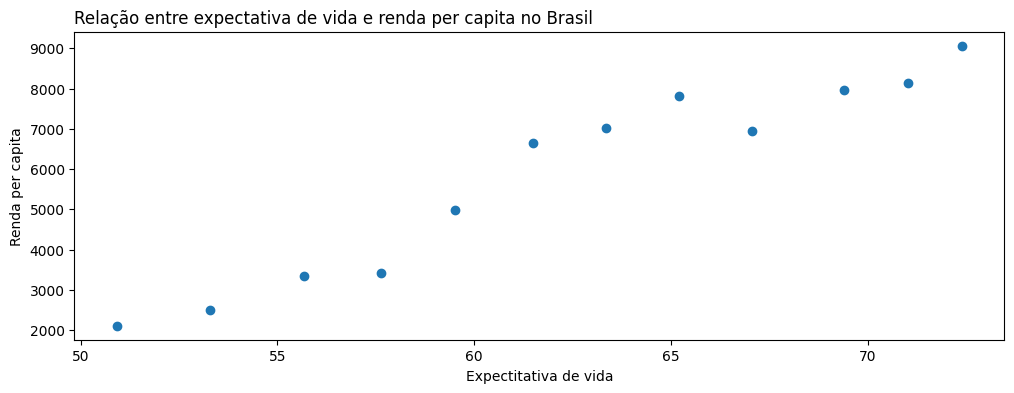

In [8]:
title = 'Relação entre expectativa de vida e renda per capita no Brasil'

plt.figure(figsize=(12,4))
plt.scatter(df['lifeExp'],df['gdpPercap'],cmap='viridis')
plt.title(title, loc= 'left')
plt.ylabel('Renda per capita')
plt.xlabel('Expectitativa de vida')
plt.show()

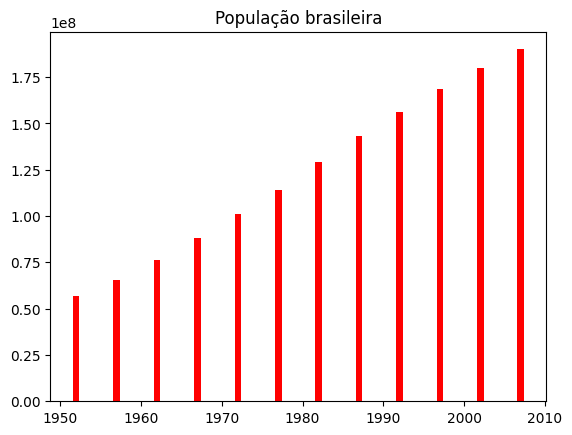

In [10]:
plt.bar(x = df.index,
    height=df['pop'],
    color = 'red'
)
plt.title('População brasileira')
plt.show()

In [15]:
# função para filtrar os dados de acordo com o continente
def filtrarContinente(continente):
    df = px.data.gapminder()
    df = df[df['continent'] == continente]
    return df

In [12]:
# função para filtrar os dados de acordo com o pais
def filtrarPais(pais, variavel):
    'Filtra algum pais da amostra para as variáveis "pop", "gdpPercap" e "lifeExp"'
    df = px.data.gapminder()
    df = df[df['country']==pais][variavel]
    return df


Text(0, 0.5, 'Renda per capita')

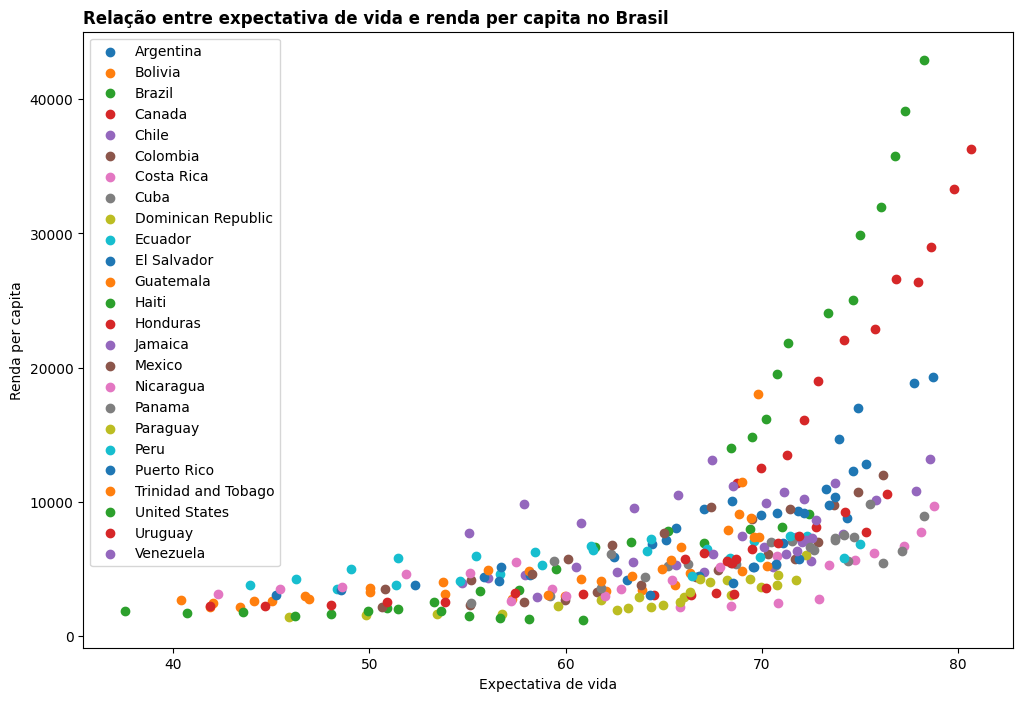

In [16]:
americas = filtrarContinente('Americas')
paises = americas['country'].unique()
plt.figure(figsize = (12,8))

for pais in paises:
    plt.scatter(filtrarPais(pais=pais,
                            variavel='lifeExp'
    ),filtrarPais(pais=pais,
                    variavel = 'gdpPercap'
    ))
plt.legend(labels = paises, loc = 'best')
plt.title(title, loc='left', weight = 'bold')
plt.xlabel('Expectativa de vida')
plt.ylabel('Renda per capita')

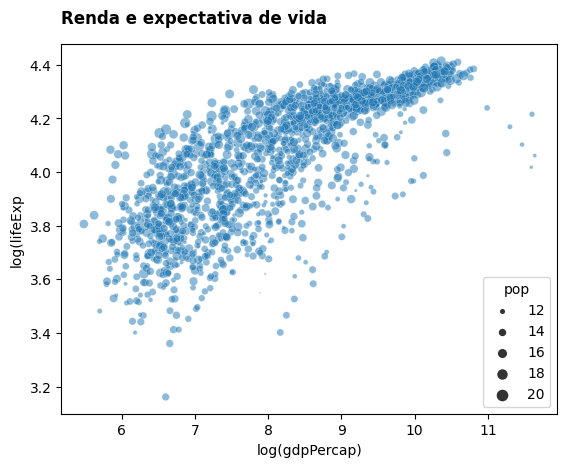

In [19]:
sns.scatterplot(
    x = np.log(data['gdpPercap']),
    y = np.log(data['lifeExp']),
    size = np.log(data['pop']),
    alpha = 0.5,
    sizes = (1,60)
)

# labels
plt.title('Renda e expectativa de vida', loc = 'left', weight='bold',pad=15)
plt.ylabel('log(lifeExp')
plt.xlabel('log(gdpPercap)')
plt.show()S